In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [50]:
import src.mnist

In [54]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB

%matplotlib inline

In [59]:
train_set, test_set = src.mnist.get_mnist_full(components=2, validation=False)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
MNIST(N=55000, dataset="train", labels=(55000,), images=(55000, 784), PCA=False, KMeans=False)
Launching PCA
Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
MNIST(N=10000, dataset="test", labels=(10000,), images=(10000, 784), PCA=False, KMeans=False)
Launching PCA


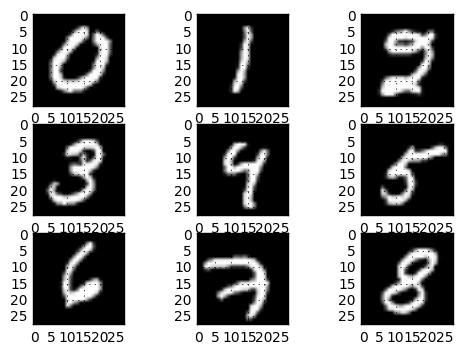

In [60]:
plt.figure(1)

for i in range(9):
    idx = np.where(train_set.labels == i)[0][0]
    plt.subplot(3, 3, i + 1)
    plt.imshow(np.reshape(train_set.images[idx] + 123, (28, 28)), cmap='gray')
    plt.grid(True)
    
plt.show()

In [61]:
pca_train_images = train_set.PCA.transform(train_set.images)

In [63]:
pca_test_images = test_set.PCA.transform(test_set.images)

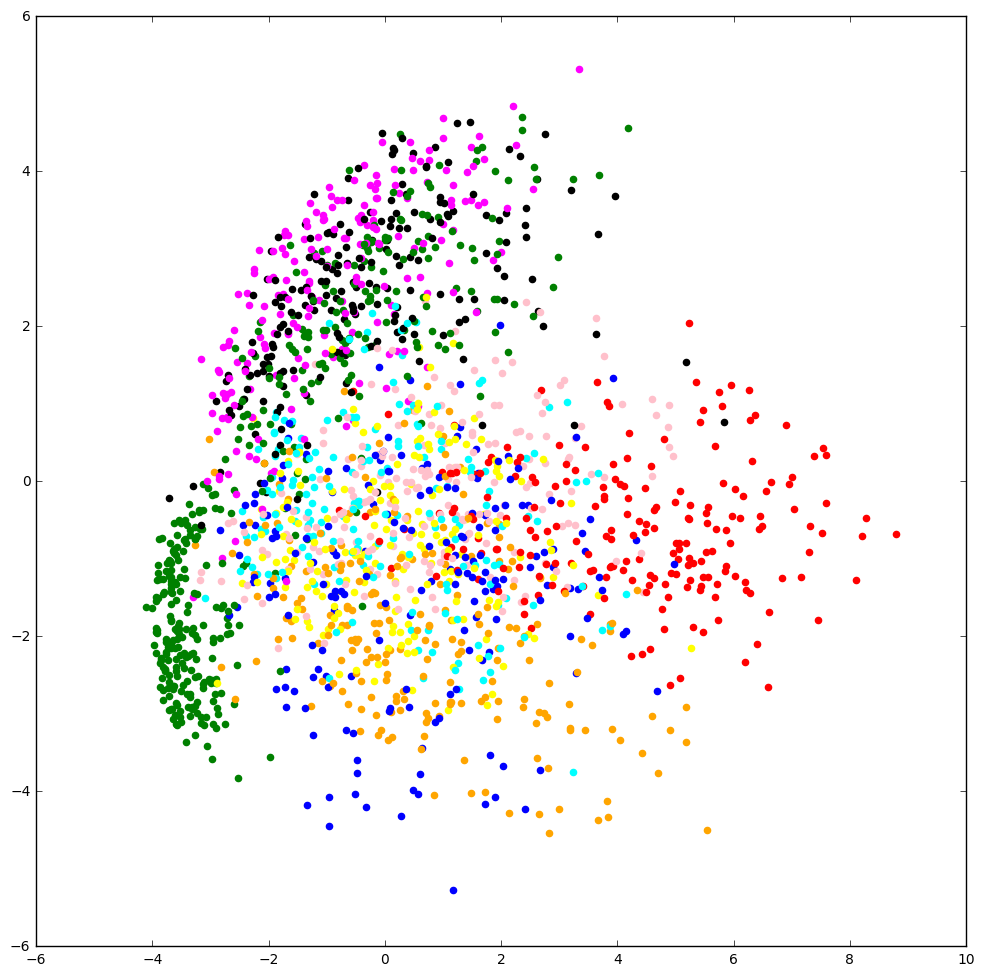

In [64]:
pylab.rcParams['figure.figsize'] = (12, 12)

color_values = ['red', 'green', 'blue', 'orange', 'green', 'cyan', 'pink', 'magenta', 'yellow', 'black']
for i in range(0, 2000):
    plt.scatter(pca_train_images[i][0], pca_train_images[i][1], color=color_values[train_set.labels[i]])

plt.show()    

In [65]:
pca = PCA()
pca.fit(train_set.images)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

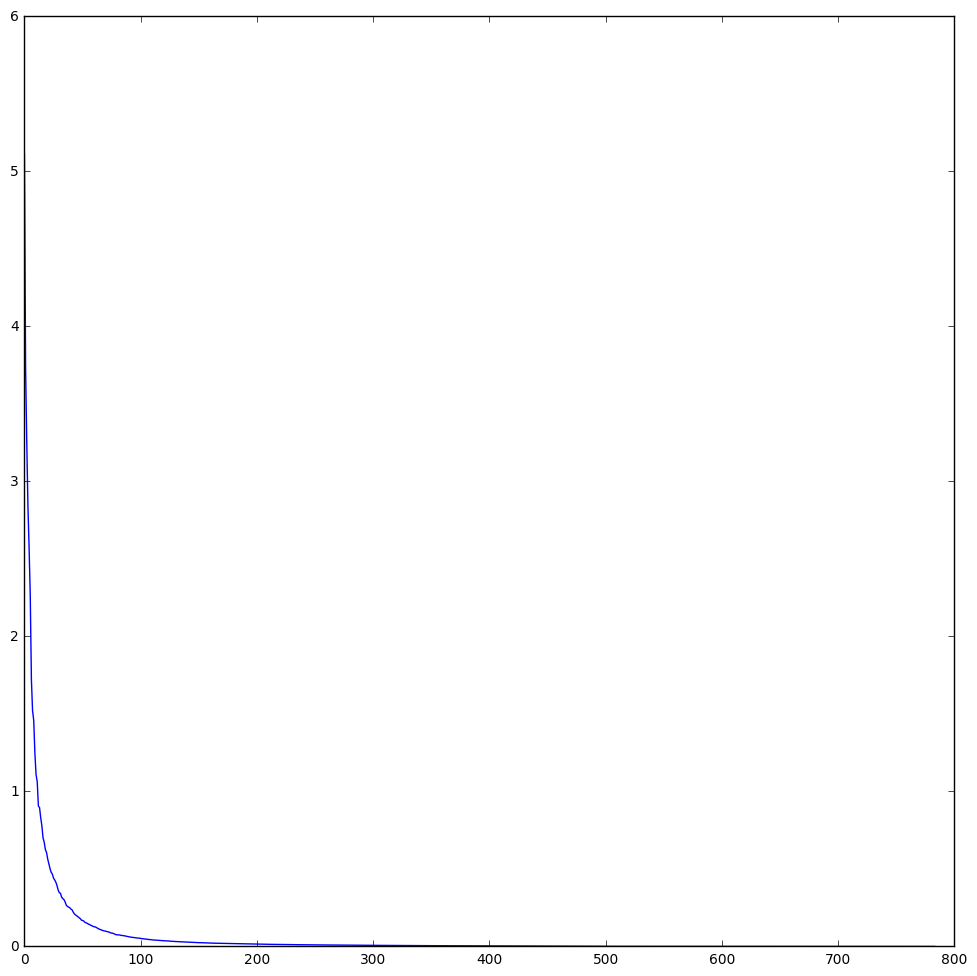

In [66]:
plt.plot(pca.explained_variance_)

In [97]:
pca3 = PCA(n_components=100)
pca3.fit(train_set.images)

PCA(copy=True, iterated_power='auto', n_components=100, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

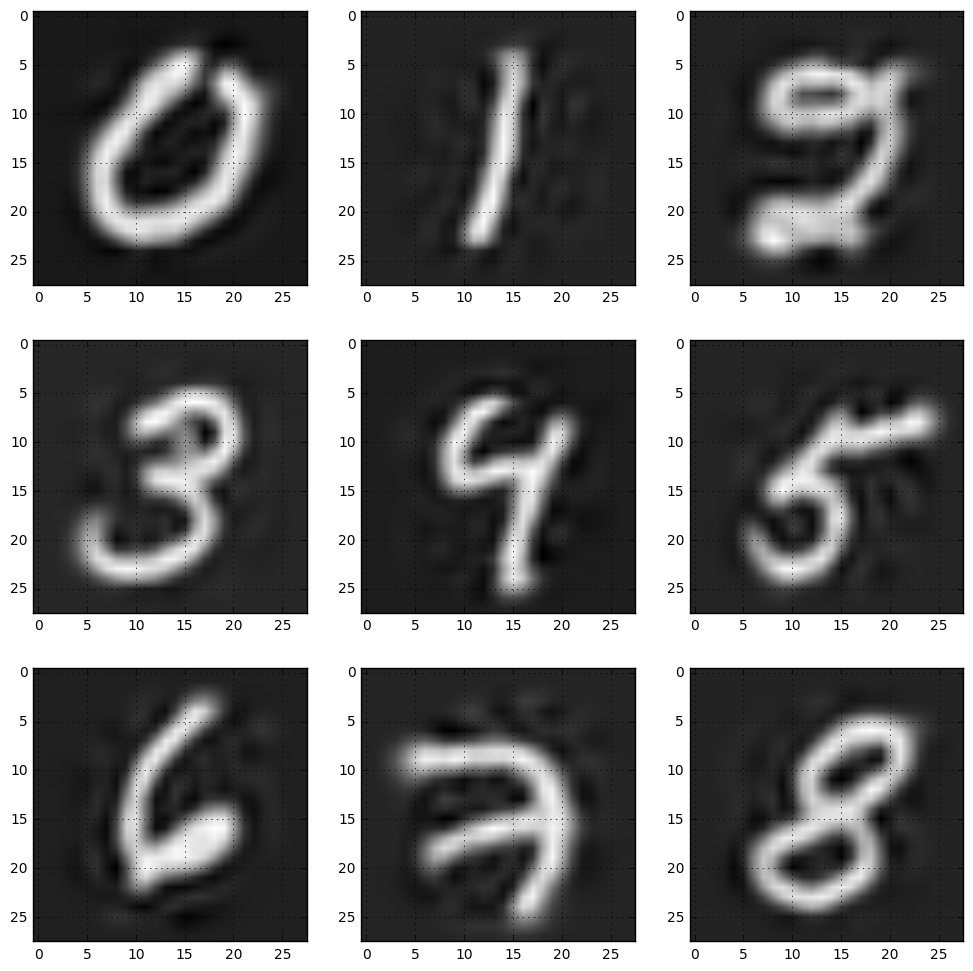

In [98]:
plt.figure(1)

for i in range(9):
    idx = np.where(train_set.labels == i)[0][0]
    transformed = pca3.transform(train_set.images[idx].reshape(1, -1))

    plt.subplot(3, 3, i + 1)
    plt.imshow(np.reshape(pca3.inverse_transform(transformed) + 123, (28, 28)), cmap='gray')
    plt.grid(True)

In [99]:
train_images_pca3 = pca3.transform(train_set.images)
test_images_pca3 = pca3.transform(test_set.images)

In [100]:
clf_gaussian = GaussianNB()
clf_gaussian.fit(train_images_pca3, train_set.labels)

GaussianNB(priors=None)

In [101]:
image_averages = clf_gaussian.theta_

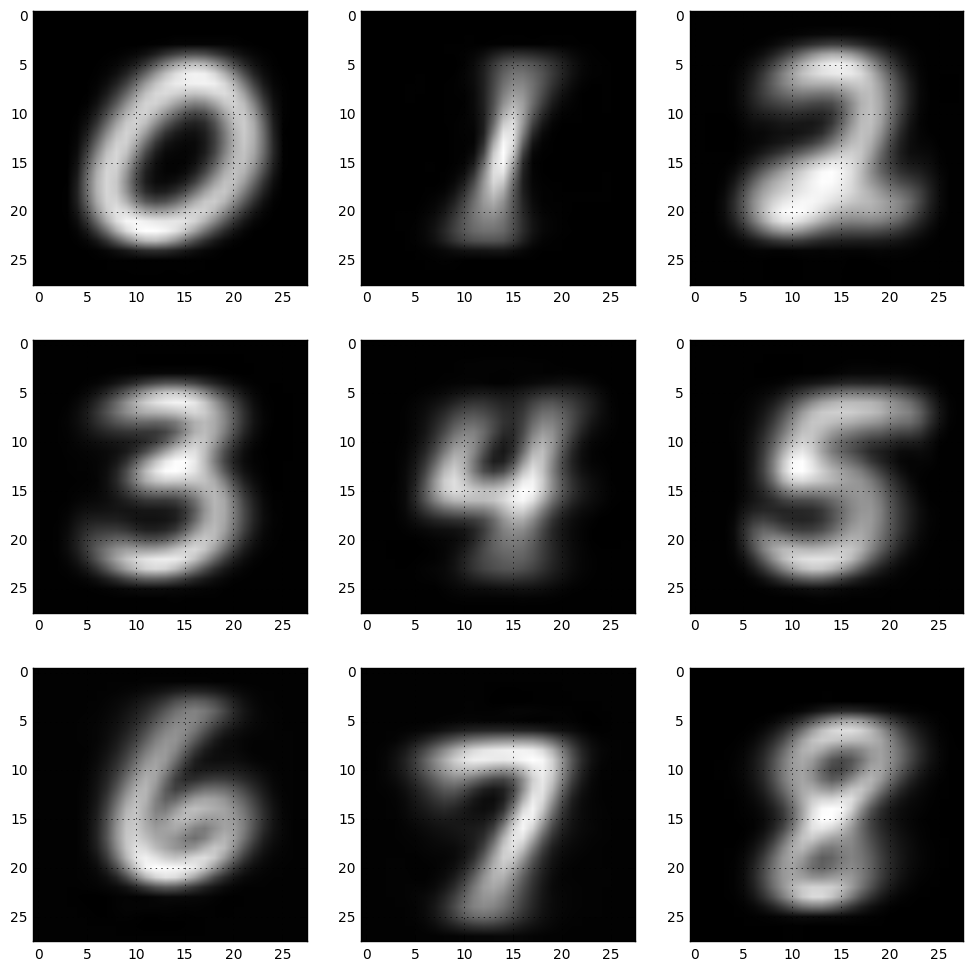

In [102]:
pylab.rcParams['figure.figsize'] = (12, 12)

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(np.reshape(pca3.inverse_transform(image_averages[i]) + 123, (28, 28)), cmap='gray')
    plt.grid(True)

plt.show()

In [103]:
label_predictions = []

for i in range(0, test_images_pca3.shape[0]):
    predicted_class = clf_gaussian.predict(test_images_pca3[i].reshape(1, -1))
    label_predictions.append([test_set.labels[i], predicted_class])

In [104]:
def get_confusion_matrix(n_classes, label_predictions):
    ret = np.zeros((n_classes, n_classes))
    for label_prediction in label_predictions:
        label = label_prediction[0]
        prediction = label_prediction[1]
        ret[label, prediction] += 1
    return ret

In [105]:
def get_error_ratio(label_predictions):
    n_errors = 0
    for label_prediction in label_predictions:
        label = label_prediction[0]
        prediction = label_prediction[1]
        if label != prediction:
            n_errors += 1
    return float(n_errors) / float(len(label_predictions))


In [106]:
confusion_matrix = get_confusion_matrix(10, label_predictions)

In [107]:
np.set_printoptions(suppress=True, threshold=10000)
print(confusion_matrix)

[[  916.     0.    35.     1.     0.    15.     9.     1.     2.     1.]
 [    0.  1068.     7.    11.     7.     9.     8.     2.    22.     1.]
 [   15.     0.   879.    55.    11.     9.     8.    10.    43.     2.]
 [    3.     0.    37.   869.     1.    31.     5.    22.    27.    15.]
 [    0.     0.    31.     2.   852.     7.    11.     4.     7.    68.]
 [    5.     1.    10.    60.     4.   760.     8.     3.    34.     7.]
 [    6.     3.    34.     1.     6.    35.   871.     0.     2.     0.]
 [    4.    17.    42.     6.    21.    17.     5.   859.    13.    44.]
 [   12.     0.    26.    26.     7.    31.     6.     7.   850.     9.]
 [   11.     0.    30.     9.    46.    21.     1.    25.    11.   855.]]


In [108]:
error_ratio = get_error_ratio(label_predictions)

In [96]:
print(error_ratio)

0.1238
